<a href="https://colab.research.google.com/github/ABHI20-STAT/Mathematical-Analysis-From-Real-to-Complex-/blob/main/Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vector Addition in $\mathbb{R}^2$ (Parallelogram Rule): Mathematical + Computational Algorithm**


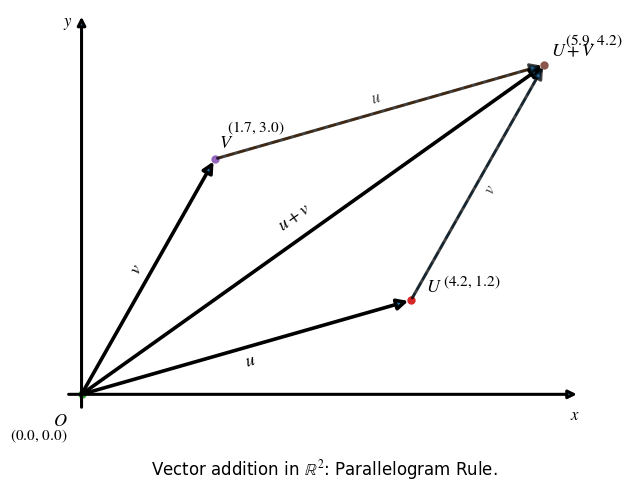

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------- Data --------------------
O  = np.array([0.0, 0.0])
U  = np.array([4.2, 1.2])
V  = np.array([1.7, 3.0])
UV = U + V  # (5.9, 4.2)

# -------------------- Helpers --------------------
def draw_arrow(ax, A, B, *, lw=2.6, alpha=1.0):
    ax.annotate(
        "", xy=B, xytext=A,
        arrowprops=dict(arrowstyle="-|>", lw=lw, mutation_scale=16, alpha=alpha),
        annotation_clip=False
    )

def draw_dashed(ax, A, B, *, lw=1.6, alpha=0.8):
    ax.plot([A[0], B[0]], [A[1], B[1]], "--", lw=lw, alpha=alpha)

def label_vector_mid(ax, A, B, text, *, normal_offset=0.16, along_offset=0.0,
                     fontsize=13, alpha=1.0, rotate=True):
    """Mid-segment label with perpendicular offset; optional rotation along segment."""
    A = np.array(A, dtype=float)
    B = np.array(B, dtype=float)
    d = B - A
    L = np.linalg.norm(d)
    if L < 1e-12:
        return

    t = d / L
    n = np.array([-t[1], t[0]])

    mid = 0.5 * (A + B)
    pos = mid + along_offset * t + normal_offset * n

    angle = np.degrees(np.arctan2(d[1], d[0])) if rotate else 0.0

    ax.text(
        pos[0], pos[1], text,
        fontsize=fontsize, alpha=alpha,
        rotation=angle, rotation_mode="anchor",
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.15", fc="white", ec="none", alpha=0.75),
        clip_on=False
    )

def smart_point_label(ax, P, name, *, origin=O, r=0.30, coord_gap=0.22,
                      fontsize=13, show_coords=True):
    """
    Place point name (CAPS) + coordinates in a readable, edge-aware way.
    Special-cases the origin so the order never looks swapped.
    """
    P = np.array(P, dtype=float)
    x, y = P

    # marker
    ax.plot(x, y, marker="o", markersize=5)

    # special-case ORIGIN: deterministic placement (name above coords)
    if np.linalg.norm(P - origin) < 1e-12:
        name_pos  = P + np.array([-0.18, -0.22])  # slightly down-left
        coord_pos = P + np.array([-0.18, -0.42])
        ax.text(name_pos[0], name_pos[1], rf"${name}$",
                fontsize=fontsize, ha="right", va="top", clip_on=False)
        if show_coords:
            ax.text(coord_pos[0], coord_pos[1], rf"$({x:.1f},\,{y:.1f})$",
                    fontsize=fontsize-2, ha="right", va="top", clip_on=False)
        return

    # base outward direction (from origin to point)
    v = P - origin
    direction = v / np.linalg.norm(v)

    # axis limits for edge awareness
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    padx = 0.06 * (xmax - xmin)
    pady = 0.06 * (ymax - ymin)

    # flip direction if near boundaries
    if x > xmax - padx:
        direction[0] = -abs(direction[0])
    if x < xmin + padx:
        direction[0] = abs(direction[0])
    if y > ymax - pady:
        direction[1] = -abs(direction[1])
    if y < ymin + pady:
        direction[1] = abs(direction[1])

    name_pos = P + r * direction
    coord_pos = P + (r + coord_gap) * direction

    ha = "left" if direction[0] >= 0 else "right"
    va = "bottom" if direction[1] >= 0 else "top"

    ax.text(name_pos[0], name_pos[1], rf"${name}$",
            fontsize=fontsize, ha=ha, va=va, clip_on=False)

    if show_coords:
        ax.text(coord_pos[0], coord_pos[1], rf"$({x:.1f},\,{y:.1f})$",
                fontsize=fontsize-2, ha=ha, va=va, clip_on=False)

# -------------------- Figure --------------------
plt.rcParams.update({
    "text.usetex": False,
    "mathtext.fontset": "stix",
    "font.size": 12
})

fig, ax = plt.subplots(figsize=(8.0, 5.0))

# extra headroom so UV label never clips
ax.set_xlim(-0.2, 6.4)
ax.set_ylim(-0.2, 4.9)
ax.set_aspect("equal", adjustable="box")

# remove default frame/ticks
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# axes with arrowheads
ax.annotate("", xy=(6.35, 0), xytext=(-0.2, 0), arrowprops=dict(arrowstyle="-|>", lw=2.2))
ax.annotate("", xy=(0, 4.85), xytext=(0, -0.2), arrowprops=dict(arrowstyle="-|>", lw=2.2))
ax.text(6.35, -0.15, r"$x$", ha="right", va="top")
ax.text(-0.12, 4.85, r"$y$", ha="right", va="top")

# -------------------- Parallelogram --------------------
draw_dashed(ax, U, UV)
draw_dashed(ax, V, UV)

# -------------------- Vectors --------------------
draw_arrow(ax, O, U)
draw_arrow(ax, O, V)
draw_arrow(ax, O, UV)

# translated copies
draw_arrow(ax, U, UV, lw=2.2, alpha=0.75)
draw_arrow(ax, V, UV, lw=2.2, alpha=0.75)

# -------------------- Vector labels (mid-line) --------------------
label_vector_mid(ax, O, U,  r"$u$",   normal_offset=-0.18)
label_vector_mid(ax, O, V,  r"$v$",   normal_offset=0.18)

# improved u+v label placement
label_vector_mid(ax, O, UV, r"$u+v$", normal_offset=0.26, along_offset=-0.10)

label_vector_mid(ax, U, UV, r"$v$", normal_offset=-0.18, alpha=0.75, fontsize=12)
label_vector_mid(ax, V, UV, r"$u$", normal_offset=0.18,  alpha=0.75, fontsize=12)

# -------------------- Point labels (CAPS + coords) --------------------
smart_point_label(ax, O,  "O",   r=0.01)
smart_point_label(ax, U,  "U",   r=0.20)
smart_point_label(ax, V,  "V",   r=0.10)
smart_point_label(ax, UV, "U+V", r=0.10)

# caption
fig.text(
    0.5, 0.02,
    r"Vector addition in $\mathbb{R}^2$: Parallelogram Rule.",
    ha="center", va="bottom"
)

plt.tight_layout(rect=[0, 0.06, 1, 1])
plt.show()


## **How the Algorithm is Developed**

This program *constructs and draws* the parallelogram rule for vector addition in $\mathbb{R}^2$.

### **1) Define the Mathematical Objects**
- Choose the origin $O=(0,0)$.
- Choose two vectors (as position vectors from the origin):
  $$
  u = U=(4.2,1.2),\qquad v = V=(1.7,3.0).
  $$
- Compute their sum using componentwise addition:
  $$
  u+v = UV = U+V = (4.2+1.7,\;1.2+3.0)=(5.9,4.2).
  $$

### **2) Build Reusable Drawing Primitives**
The code defines small “sub-algorithms” (functions) so the main logic stays clean.

- **`draw_arrow(ax, A, B)`**  
  Draws a directed segment (arrow) from point $A$ to point $B$.

- **`draw_dashed(ax, A, B)`**  
  - Draws a dashed segment from $A$ to $B$.  
  - Used to draw the *two missing edges* of the parallelogram.

- **`label_vector_mid(ax, A, B, text, ...)`**  
  Places a label (like $u, v, u+v$) near the midpoint of segment $AB$.  
  Algorithmic idea:
  1. Compute direction $d=B-A$, length $L=\|d\|$.
  2. Unit tangent $t = d/L$.
  3. Unit normal $n = (-t_y,\,t_x)$ (perpendicular offset direction).
  4. Put label at `midpoint + along_offset*t + normal_offset*n`.
  5. Optionally rotate label by the segment angle $\arg(d)$.

- **`smart_point_label(ax, P, name, ...)`**  
  Plots the point and places text (name + coordinates) near it without clipping at plot boundaries.
  Algorithmic idea:
  1. Start with outward direction from origin: $(P-O)/\|P-O\|$.
  2. If the point is near plot edges, flip the direction components.
  3. Place the name and coordinates along that direction with two different radii.
  4. Special-case the origin so text order/placement is always consistent.

### **3) Create and Configure the Coordinate System**
- Create a figure and axis.
- Fix axis limits and aspect ratio so geometry isn’t distorted (`equal`).
- Hide spines and ticks to make it look like a clean vector diagram.
- Draw $x$- and $y$-axes with arrowheads.

### **4) Construct the Parallelogram**
Parallelogram rule says:
- Translate $v$ to start at the tip of $u$: draw $U \to UV$.
- Translate $u$ to start at the tip of $v$: draw $V \to UV$.

So the program:
- Draws dashed edges $U \to UV$ and $V \to UV$ (parallelogram sides).
- Draws arrows:
  - $O \to U$ (vector $u$)
  - $O \to V$ (vector $v$)
  - $O \to UV$ (vector $u+v$)
  - plus the translated copies $U \to UV$ and $V \to UV$.

### 5) Add labels and annotations (readability)
- Label the vectors on their mid-segments ($u, v, u+v$).
- Label points $O, U, V, U+V$ along with their coordinates.
- Add a caption: “Vector addition in $\mathbb{R}^2$: Parallelogram Rule.”

## **Pseudocode**

### **High-level Pseudocode**
1. Initialize points $O, U, V$.
2. Compute $UV \leftarrow U + V$.
3. Setup plotting window, axes, and styling.
4. Draw dashed segments $U \to UV$ and $V \to UV$.
5. Draw arrows $O \to U, O \to V,  \to UV$.
6. Draw translated arrows $U \to UV$ and $V \to UV$.
7. Place vector labels near midpoints with controlled offsets.
8. Plot and label points $O, U, V, UV$ with coordinates (edge-aware).
9. Add caption and render.

### **Helper Pseudocode: `label_vector_mid(A,B,text)`**
- $d \leftarrow B-A$
- $L \leftarrow \|d\|$; if $L$ very small: stop
- $t \leftarrow d/L$
- $n \leftarrow -t_y, t_x$
- $\text{mid} \leftarrow (A+B)/2$
- $\text{pos} \leftarrow \text{mid} + \text{along\_offset}\cdot t + \text{normal\_offset}\cdot n$
- $\theta \leftarrow \arctan2(d_y,d_x)$
- Draw `text` at `pos` with optional rotation $\theta$.

### **Helper Pseudocode: `smart_point_label(P,name)`**
- Plot marker at $P$
- If $P=O$: place name and coordinates at fixed offsets; stop
- $dir \leftarrow (P-O)/\|P-O\|$
- Read axis limits; if near right/left/top/bottom edge: flip components of `dir`
- Place name at $P + r\cdot dir$
- Place coordinates at $P + (r+\text{gap})\cdot dir$
- Choose alignment $left/right, top/bottom$ based on sign of `dir`.


In [14]:
import numpy as np
import plotly.graph_objects as go

# -------------------- Data --------------------
O  = np.array([0.0, 0.0])
U  = np.array([4.2, 1.2])
V  = np.array([1.7, 3.0])
UV = U + V  # (5.9, 4.2)

# -------------------- Helpers --------------------
def add_segment(fig, A, B, *, dashed=False, width=3, opacity=1.0, name=None, showlegend=False):
    """Add a (possibly dashed) segment A->B as a Scatter trace."""
    A = np.asarray(A, float); B = np.asarray(B, float)
    fig.add_trace(
        go.Scatter(
            x=[A[0], B[0]], y=[A[1], B[1]],
            mode="lines",
            line=dict(width=width, dash="dash" if dashed else "solid"),
            opacity=opacity,
            name=name,
            showlegend=showlegend,
            hoverinfo="skip",
        )
    )

def add_arrow(fig, A, B, *, width=3, opacity=1.0):
    """
    Plotly arrow using an annotation.
    We also draw a line trace for a clean shaft.
    """
    add_segment(fig, A, B, dashed=False, width=width, opacity=opacity)
    A = np.asarray(A, float); B = np.asarray(B, float)
    fig.add_annotation(
        x=B[0], y=B[1], ax=A[0], ay=A[1],
        xref="x", yref="y", axref="x", ayref="y",
        showarrow=True,
        arrowhead=3,      # arrowhead style
        arrowsize=1.4,    # arrowhead size
        arrowwidth=width, # head/shaft thickness
        opacity=opacity,
        arrowcolor="black"
    )

def label_mid(fig, A, B, text, *, normal_offset=0.18, along_offset=0.0,
              fontsize=15, opacity=1.0, rotate=True):
    """
    Mid-segment label: place at midpoint + along*t + normal*n
    where t is unit tangent, n is unit normal.
    """
    A = np.asarray(A, float); B = np.asarray(B, float)
    d = B - A
    L = np.linalg.norm(d)
    if L < 1e-12:
        return
    t = d / L
    n = np.array([-t[1], t[0]])

    mid = 0.5*(A + B)
    pos = mid + along_offset*t + normal_offset*n

    angle = np.degrees(np.arctan2(d[1], d[0])) if rotate else 0.0

    fig.add_annotation(
        x=pos[0], y=pos[1],
        text=text,
        showarrow=False,
        font=dict(size=fontsize, color="black"),
        opacity=opacity,
        textangle=angle,
        bgcolor="rgba(255,255,255,0.75)",
        bordercolor="rgba(0,0,0,0)",
        borderpad=3
    )

def point_label(fig, P, name, *, r=0.22, coord_gap=0.18, origin=O, show_coords=True):
    """Point marker + label + coords, pushed outward from origin."""
    P = np.asarray(P, float)
    x, y = P

    # marker
    fig.add_trace(
        go.Scatter(
            x=[x], y=[y],
            mode="markers",
            marker=dict(size=7, color="black"),
            hovertemplate=f"{name}: ({x:.1f}, {y:.1f})<extra></extra>",
            showlegend=False
        )
    )

    # origin special-case
    if np.linalg.norm(P - origin) < 1e-12:
        name_pos  = P + np.array([-0.18, -0.22])
        coord_pos = P + np.array([-0.18, -0.42])
        fig.add_annotation(x=name_pos[0], y=name_pos[1], text=f"${name}$", showarrow=False)
        if show_coords:
            fig.add_annotation(x=coord_pos[0], y=coord_pos[1],
                               text=f"$({x:.1f},\\,{y:.1f})$", showarrow=False,
                               font=dict(size=12))
        return

    # outward direction
    v = P - origin
    direction = v / np.linalg.norm(v)

    name_pos  = P + r * direction
    coord_pos = P + (r + coord_gap) * direction

    fig.add_annotation(x=name_pos[0], y=name_pos[1], text=f"${name}$", showarrow=False)
    if show_coords:
        fig.add_annotation(x=coord_pos[0], y=coord_pos[1],
                           text=f"$({x:.1f},\\,{y:.1f})$", showarrow=False,
                           font=dict(size=12))

# -------------------- Build figure --------------------
fig = go.Figure()

# axis limits (match your matplotlib headroom idea)
xmin, xmax = -0.2, 6.4
ymin, ymax = -0.2, 4.9

# --- Parallelogram (dashed completion edges) ---
add_segment(fig, U,  UV, dashed=True, width=2, opacity=0.85)
add_segment(fig, V,  UV, dashed=True, width=2, opacity=0.85)

# --- Vectors from origin ---
add_arrow(fig, O, U,  width=4, opacity=1.0)
add_arrow(fig, O, V,  width=4, opacity=1.0)
add_arrow(fig, O, UV, width=4, opacity=1.0)

# --- Translated copies ---
add_arrow(fig, U, UV, width=3, opacity=0.75)  # v translated
add_arrow(fig, V, UV, width=3, opacity=0.75)  # u translated

# --- Vector labels (mid-line) ---
label_mid(fig, O, U,  r"$u$",   normal_offset=-0.20, fontsize=16)
label_mid(fig, O, V,  r"$v$",   normal_offset=0.20,  fontsize=16)

label_mid(fig, O, UV, r"$u+v$", normal_offset=0.29, along_offset=-0.15, fontsize=16)

label_mid(fig, U, UV, r"$v$", normal_offset=-0.18, opacity=0.75, fontsize=14)
label_mid(fig, V, UV, r"$u$", normal_offset=0.18,  opacity=0.75, fontsize=14)

# --- Point labels (CAPS + coords) ---
point_label(fig, O,  "O",   r=0.01)
point_label(fig, U,  "U",   r=0.25, coord_gap=0.4)
point_label(fig, V,  "V",   r=0.15, coord_gap=0.3)
point_label(fig, UV, "U+V", r=0.25, coord_gap=0.3)

# -------------------- Layout styling --------------------
fig.update_layout(
    title=dict(
        text=r"Vector Addition in $\mathbb{R}^2$: Parallelogram Rule",
        x=0.5
    ),
    width=850,
    height=520,
    margin=dict(l=30, r=30, t=60, b=40),
    showlegend=False,

    # clean look
    plot_bgcolor="white",
    paper_bgcolor="white",

    xaxis=dict(
        range=[xmin, xmax],
        showgrid=False,
        zeroline=False,
        showline=False,
        ticks="",
        showticklabels=False,
        title=""
    ),
    yaxis=dict(
        range=[ymin, ymax],
        showgrid=False,
        zeroline=False,
        showline=False,
        ticks="",
        showticklabels=False,
        title="",
        scaleanchor="x",  # equal aspect
        scaleratio=1
    ),
)

# Draw coordinate axes as lines (with arrowheads using annotations)
# x-axis
add_segment(fig, [xmin, 0], [xmax, 0], dashed=False, width=3, opacity=1.0)
fig.add_annotation(
    x=xmax, y=0, ax=xmax-0.25, ay=0,
    xref="x", yref="y", axref="x", ayref="y",
    showarrow=True, arrowhead=3, arrowsize=1.4, arrowwidth=3,
    arrowcolor="black"
)
fig.add_annotation(x=xmax, y=-0.15, text=r"$x$", showarrow=False)

# y-axis
add_segment(fig, [0, ymin], [0, ymax], dashed=False, width=3, opacity=1.0)
fig.add_annotation(
    x=0, y=ymax, ax=0, ay=ymax-0.25,
    xref="x", yref="y", axref="x", ayref="y",
    showarrow=True, arrowhead=3, arrowsize=1.4, arrowwidth=3,
    arrowcolor="black"
)
fig.add_annotation(x=-0.12, y=ymax, text=r"$y$", showarrow=False)

fig.show()

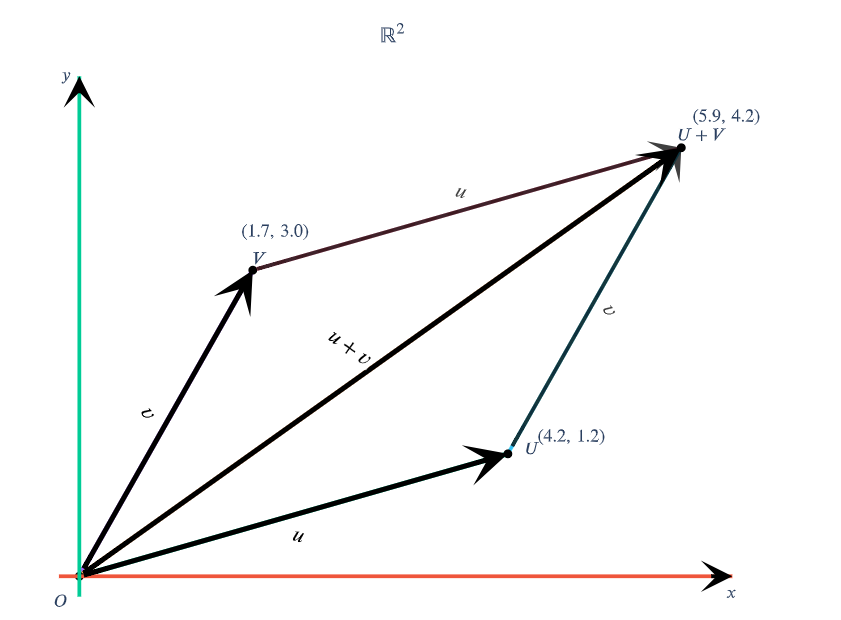

With Plotly, I treat the same diagram as a *geometric scene* made of a few layers:
1. **Data layer** (points + vectors in $\mathbb{R}^2$)
2. **Geometry layer** (parallelogram edges + translated copies)
3. **Annotation layer** (labels for vectors, points, axes, caption)
4. **Layout layer** (aspect ratio, limits, clean style, no clutter)

The mathematical core does **not** change:
$$
O=(0,0),\quad u=U,\quad v=V,\quad u+v=UV=U+V.
$$

## **Plotly Interpretation of Each Component**

### **1) Represent Vectors as Line-Segments**

In Plotly, a vector $A\to B$ is drawn as:
- A **line trace** from $A \to B$, plus an **arrowhead**, usually implemented by:
  - `layout.annotations` with `showarrow=True`, or
  - a short second segment forming a triangular head, or
  - Plotly’s `annotation` arrow (most common and clean).

- **VectorArrow(A,B)** = draw a line $AB + \text{draw arrowhead at}\; B$.


### **2) Labels in Plotly**

Plotly labels can be handled in two good ways:
- **Text traces**: a scatter trace with `mode="text"` at computed positions.
- **Annotations**: `layout.annotations` positioned at \((x,y)\).

For “mid-segment” vector labels, I’d keep the same math as in Matplotlib:
- midpoint: $\frac{A+B}{2}$
- tangent unit vector $t$
- normal unit vector $n$
- label position: `mid + along_offset*t + normal_offset*n`

### **4) Point Labels**
In Plotly, clipping is less painful because annotations can sit outside data, but I still follow the same idea:
- direction from origin,
- flip direction near edges,
- place label + coordinate text along that direction.


## Plotly-oriented Pseudocode (conceptual)

1. Define points: $O, U, V$
2. Compute sum: $UV = U+V$
3. Create `fig = go.Figure()`
4. Add axes lines (optional) or use standard axes with clean styling
5. Add dashed traces for parallelogram edges: $U\to UV, V\to UV$
6. Add arrow vectors: $O\to U, O\to V, O\to UV$
7. Add translated arrows: $U\to UV, V\to UV$ (lighter opacity)
8. Add point markers and point-name + coordinate annotations
9. Add vector labels at offset midpoints
10. Set layout:
   - equal aspect ratio (`scaleanchor="x", scaleratio=1`)
   - fixed ranges for $x$ and $y$
   - hide grid/ticks if you want “diagram style”
11. Render interactively (zoom, pan, hover)


## **What Becomes Better with Plotly**
- **Interactivity**: zoom/pan lets you inspect geometry and labels cleanly.
- **Hover information**: you can show exact coordinates on hover for $U, V, UV$.
- **Presentation**: easy export to HTML, great for notebooks and web embedding.
- **Parameter exploration**: sliders can vary $u$ and $v$ live and show how $u+v$ moves.

## **Attention to Practical Details**
- **Aspect ratio must be 1:1** (otherwise the parallelogram “lies” visually).
- **Arrowheads**: use annotations consistently so direction is unambiguous.
- **Label collisions**: compute offsets using the same normal-vector method.
- **Limits with padding**: choose 'x' or 'y' ranges that leave room for text.


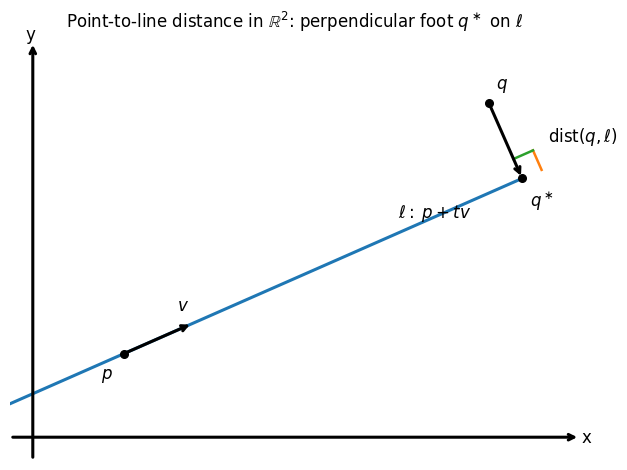

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def point_to_line_foot(p, v, q):
    """
    Compute perpendicular foot q* of point q onto line l: p + t v
    (v must be nonzero).
    """
    p = np.array(p, dtype=float)
    v = np.array(v, dtype=float)
    q = np.array(q, dtype=float)

    vv = np.dot(v, v)
    if vv == 0:
        raise ValueError("Direction vector v must be nonzero.")

    t = np.dot(q - p, v) / vv
    qstar = p + t * v
    return qstar, t

# -----------------------
# Choose geometry (edit)
# -----------------------
p = (1.2, 1.1)      # point on the line
v = (5.0, 2.2)      # direction of the line
q = (6.0, 4.4)      # external point

qstar, tproj = point_to_line_foot(p, v, q)

# -----------------------
# Plot settings
# -----------------------
fig, ax = plt.subplots(figsize=(8.5, 4.8))

# Axes limits chosen to give whitespace and avoid overlap
ax.set_xlim(-0.3, 7.2)
ax.set_ylim(-0.3, 5.2)
ax.set_aspect("equal", adjustable="box")

# Draw axes with arrowheads
ax.annotate("", xy=(7.2, 0), xytext=(-0.3, 0),
            arrowprops=dict(arrowstyle="->", lw=2.2))
ax.annotate("", xy=(0, 5.2), xytext=(0, -0.3),
            arrowprops=dict(arrowstyle="->", lw=2.2))
ax.text(7.22, -0.08, "x", fontsize=12)
ax.text(-0.10, 5.22, "y", fontsize=12)

# Draw the line segment for l: p + t v (use a window of t-values)
p_arr = np.array(p, float)
v_arr = np.array(v, float)

t1, t2 = -0.65, 1.05
L1 = p_arr + t1 * v_arr
L2 = p_arr + t2 * v_arr
ax.plot([L1[0], L2[0]], [L1[1], L2[1]], lw=2.2)

# Label the line (placed away from the geometry)
mid = 0.62 * L2 + 0.38 * p_arr
ax.text(mid[0] + 0.35, mid[1] + 0.35, r"$\ell:\; p+tv$", fontsize=12)

# Plot points p, q, q*
def draw_point(pt, label, offset=(0.08, 0.08), ha="left", va="bottom"):
    ax.plot(pt[0], pt[1], "ko", ms=5.5)
    ax.text(pt[0] + offset[0], pt[1] + offset[1], label, fontsize=12, ha=ha, va=va)

draw_point(p_arr, r"$p$", offset=(-0.15, -0.18), ha="right", va="top")
draw_point(np.array(q), r"$q$", offset=(0.10, 0.10), ha="left", va="bottom")
draw_point(qstar, r"$q^\ast$", offset=(0.10, -0.15), ha="left", va="top")

# Draw distance segment q -> q*
ax.annotate("", xy=(qstar[0], qstar[1]), xytext=(q[0], q[1]),
            arrowprops=dict(arrowstyle="->", lw=2.2))

# Distance label (offset so it doesn't sit on the arrow)
m = 0.52 * qstar + 0.48 * np.array(q)
ax.text(m[0] + 0.55, m[1] + 0.00, r"$\mathrm{dist}(q,\ell)$", fontsize=12)

# Draw a small direction arrow for v at p
v_small = p_arr + 0.18 * v_arr
ax.annotate("", xy=(v_small[0], v_small[1]), xytext=(p_arr[0], p_arr[1]),
            arrowprops=dict(arrowstyle="->", lw=2.2))
ax.text(p_arr[0] + 0.13 * v_arr[0] + 0.05,
        p_arr[1] + 0.13 * v_arr[1] + 0.28,
        r"$v$", fontsize=12)

# Right-angle marker at q*
# Build unit vectors along v and perpendicular to v
vlen = np.linalg.norm(v_arr)
u = v_arr / vlen
n = np.array([-u[1], u[0]])

s = 0.28  # marker size
A = qstar + s * u
B = A + s * n
C = qstar + s * n

ax.plot([A[0], B[0]], [A[1], B[1]], lw=1.8)
ax.plot([B[0], C[0]], [B[1], C[1]], lw=1.8)

# Clean look: remove default spines/ticks
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# Caption-like title (optional)
ax.set_title(r"Point-to-line distance in $\mathbb{R}^2$: perpendicular foot $q^\ast$ on $\ell$",
             fontsize=12, pad=10)

plt.tight_layout()
plt.savefig("point_to_line_distance.png", dpi=300)
plt.show()


This code visualizes a fundamental geometric construction in $\mathbb{R}^2$: the **perpendicular projection** of a point $q$ onto a line $\ell$ given in parametric form

$$\ell=\{\,p+t\,v : t\in\mathbb{R}\,\},\; \text{where}\; p\; \text{is a point on the line and}\; v\neq 0\; \text{is its direction vector.} $$

Mathematically, the key step is to find the scalar parameter $t^{*}$ such that the projected point $q^{*}$ on the line satisfies $q^{*} = p + t^{*} v$ and the displacement $(q-q^\*)$ is orthogonal to the line direction $v$. This orthogonality condition $(q-q^\*)\cdot v = 0$ leads directly to the projection formula
$$
t^{*} = \frac{(q-p)\cdot v}{v\cdot v},\qquad q^{*} = p + t^{*} v,
$$

which is exactly what the function `point_to_line_foot(p, v, q)` computes; it also checks the algorithmic precondition $v\neq 0$ (since dividing by $v\cdot v$ would otherwise be invalid). Once $q^{*}$) is computed, the **point-to-line distance** is conceptually the Euclidean length $\|q-q^{*}\|$, and the plot expresses this distance as the directed segment from \(q\) to \(q^\*\) (drawn with an arrow). The remaining plotting steps are all about turning the mathematics into a readable diagram: drawing a finite window of the infinite line by choosing a parameter range $[t_1,t_2]$, marking the points $p,q,q^{*}$), placing labels away from overlap, adding a short arrow at $p$ to indicate the direction $v$, and finally constructing a small right-angle marker at $q^{*}$ using a unit vector $u=v/\|v\|$ and its perpendicular normal $n=(-u_y,u_x)$ to visually certify that $(q-q^{*})\perp v$.

From a “thinking and development” perspective, this picture is a gateway to many extensions: you can generalize the same projection idea to **distance from a point to a line segment** (by clamping $t^{*}$) into $[0,1]$) when the segment is $[p,p+v]$), to **distance from a point to a plane** in $\mathbb{R}^3$ (replace the line direction with a plane normal and project along that normal), and more broadly to **least-squares geometry**, where “closest point” problems become projections onto subspaces using dot products (or matrices). You can also turn the plot into an exploratory tool by varying $q$ and seeing how $q^{*}$ moves along $\ell$, by drawing the circle centered at $q$ with radius $\|q-q^{*}\|$ to emphasize minimal distance, or by adding multiple points $q_i$ and projecting all of them to build intuition for projection as a linear operator. Computationally, this exact algorithm is the core of practical tasks such as computing residuals in regression (distance to a model line), collision detection (closest point computations), and optimization (minimizing squared distances), so one natural next step is to package the projection routine into a small geometry library and then build richer visuals: showing the decomposition $q-p = \mathrm{proj}_v(q-p) + \mathrm{rej}_v(q-p)$, animating $t^{*}$ as $q$ moves, or extending to higher dimensions using vector/matrix projection formulas.


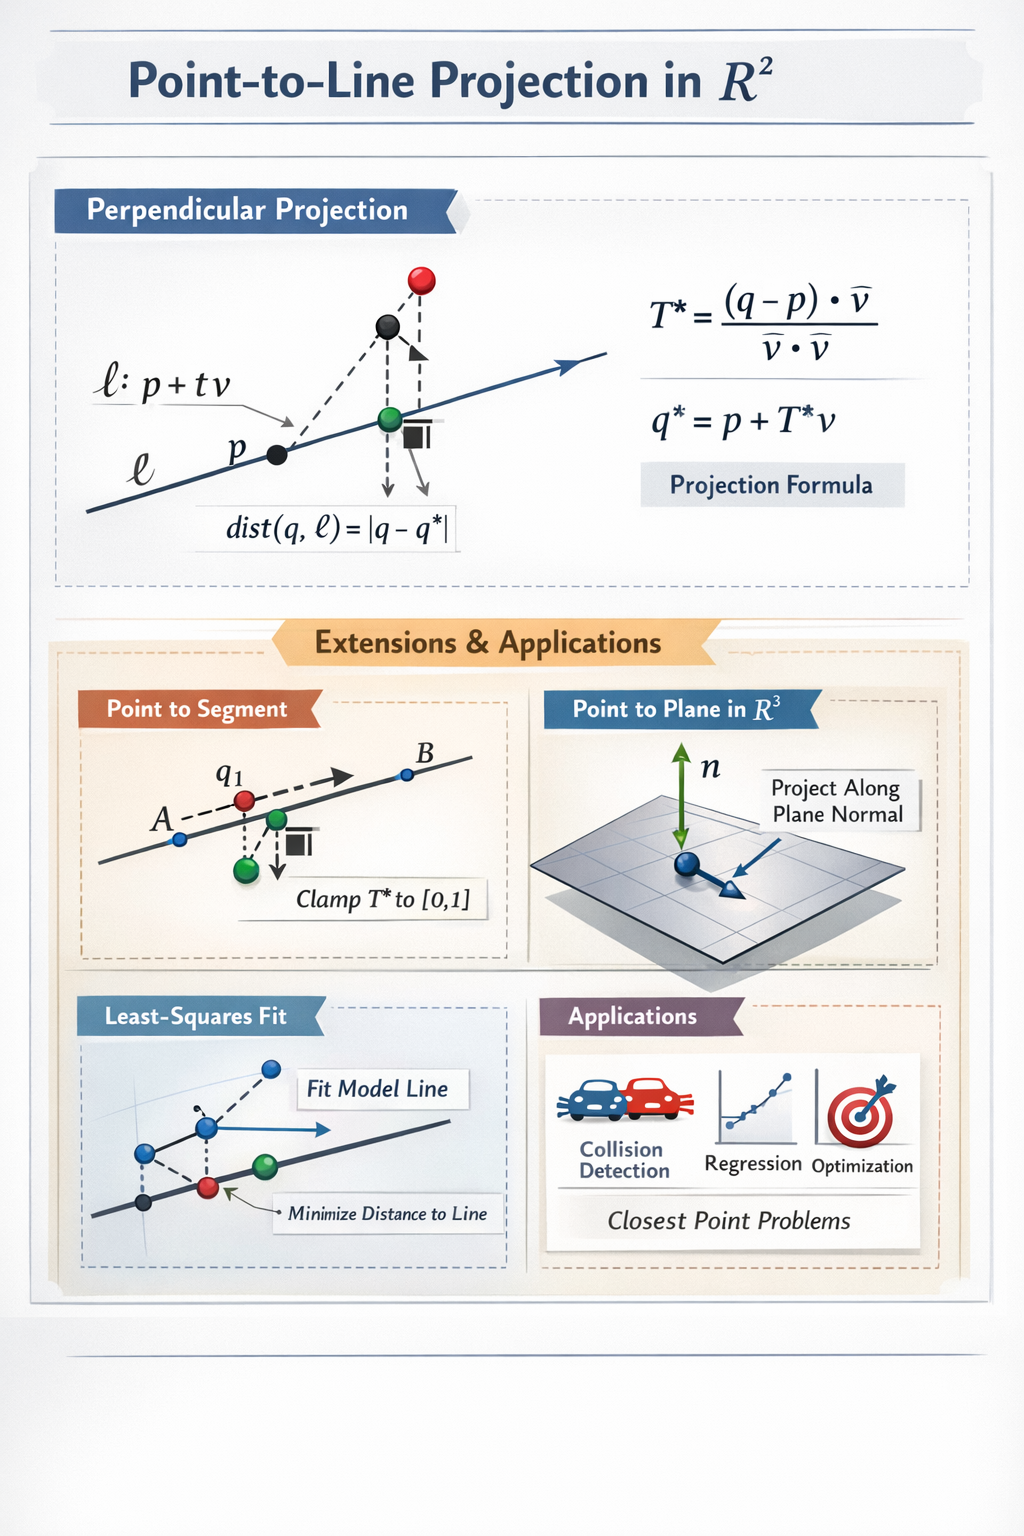